# Visualizing statistical estimates and fits

This tutorial shows how to visualize interaction effects included in regression
models such as:

\begin{equation}
  y = \alpha + \beta * x + \gamma * z + \delta * x * z + \epsilon
\end{equation}

Mainly, we use interaction terms to take into account that the effect of the  
independent variable $x$ on the outcome $y$ is contingent on the value of a 
third variable $z$.

Examples:

+   the economic value of patents is contingent on the intellectual property
    regime of a country/set of countries
+   the economic returns of schooling are contingent on the institutional and
    cultural environment of a country
+   the social influence of a Soundcloud user's suggestions/reposts is contingent 
    on followership
+   the influence of job satisfaction on intent to quit is contingent on the 
    size of the employer 

Key reference:

![](images/baron_kenney.png)

# Setup

## Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import statsmodels.api as sm
import statsmodels.formula as smf
import matplotlib.gridspec as gridspec
import pandas as pd

## Viz options

In [65]:
rc('font',**{'family':'serif','serif':['Avant Garde']})
rc('text', usetex=True)

# Application

## Goal

The working hypothesis is that lower levels of job satisfaction ($x$) increases the
chances of turnover, i.e., intent to quit ($y$).

On top of this, we think the negative relationship between  $x$ and $y$ depends
on the size of the employer. The intuition is that large employers have an 
internal labor market that allows individuals to change job positions (get a
better fit with the task) without quitting the employment relation.

The **goal** is showing how the relationship between job satisfaction and 
intent to quit (as estimated via OLS) changes as firm size increases.

## Data simulation

We simulate multiple datasets involving the following variables:

+   job satisfaction - the extent to which an employee is happy with his/her job
    (let's assume we have Likert scale data; legend: 1 = not at all, 5 = to a 
    great extent)
+   intent to quit - the extent to which an employee considers the possibility 
    to quit the current job (let's assume we have Likert scale data; legend: 1 
    = not at all, 5 = to a great extent)
+   age (in years)
+   organizational tenure (years spent working for the employer)
   
Let's assume that all variables have been transformed into z-scores.
   
Each dataset we simulate reflect the following cohorts of employers:

+   micro firms: 1 - 5 employees
+   small firms: 6 - 25 employees
+   medium firms: 26 - 100 employees
+   large firms: 100 - 500 employees
+   very large firms: 500 + 

In [3]:
# sample size
num_samples = 1000

# variables' mean 
mu = np.repeat(0, 4)

# names
names = ['job_sat', 'int_qui', 'age', 'org_tnr']

### Micro firms

In [4]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.40, -0.03,  0.11],
        [ -0.40,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_1_5 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                      columns=names)

# expand
df_1_5.loc[:, 'cohort'] = 'micro'
df_1_5.loc[:, 'firm_size'] = np.random.randint(low=1, high=5, size=num_samples)

In [5]:
df_1_5.head()

,job_sat,int_qui,age,org_tnr,cohort,firm_size
0,0.185160,-0.562084,-0.530656,1.857198,micro,2
1,-0.684320,1.491197,-1.383997,-0.728874,micro,2
2,-1.396782,-1.235545,0.663748,-1.063721,micro,1
3,-0.173112,-0.588497,-0.252541,-0.313339,micro,1
4,-0.215435,-0.673368,0.723827,-0.992488,micro,3


### Small firms

In [6]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.30, -0.03,  0.11],
        [ -0.30,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_6_25 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                       columns=names)

# expand
df_6_25.loc[:, 'cohort'] = 'small'
df_6_25.loc[:, 'firm_size'] = np.random.randint(low=6,
                                                high=25,
                                                size=num_samples)

In [7]:
df_6_25.head()

,job_sat,int_qui,age,org_tnr,cohort,firm_size
0,0.580878,-0.976079,-1.234136,-0.624468,small,8
1,0.278227,-2.445078,0.187736,0.281559,small,14
2,0.075418,-0.321842,-1.500893,0.397219,small,18
3,0.843290,1.533798,-0.758188,1.048303,small,9
4,-1.215058,0.396275,-0.253535,0.808313,small,6


### Medium firms

In [8]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.25, -0.03,  0.11],
        [ -0.25,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_26_100 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                         columns=names)

# expand
df_26_100.loc[:, 'cohort'] = 'medium'
df_26_100.loc[:, 'firm_size'] = np.random.randint(low=26,
                                                  high=100,
                                                  size=num_samples)

### Large firms

In [9]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.20, -0.03,  0.11],
        [ -0.20,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_101_500 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                          columns=names)

# expand
df_101_500.loc[:, 'cohort'] = 'large'
df_101_500.loc[:, 'firm_size'] = np.random.randint(low=101, high=500,
                                                size=num_samples)

### Very large firms

In [10]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.15, -0.03,  0.11],
        [ -0.15,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_501_ = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                       columns=names)

# expand
df_501_.loc[:, 'cohort'] = 'very large'
df_501_.loc[:, 'firm_size'] = np.random.randint(low=501, high=2000,
                                                size=num_samples)

#### Data preparation

In [48]:
df = pd.concat([df_1_5, df_6_25, df_26_100, df_101_500, df_501_],
               axis=0)
df.info()

df.head()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job_sat    5000 non-null   float64
 1   int_qui    5000 non-null   float64
 2   age        5000 non-null   float64
 3   org_tnr    5000 non-null   float64
 4   cohort     5000 non-null   object 
 5   firm_size  5000 non-null   int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 253.9+ KB


,job_sat,int_qui,age,org_tnr,cohort,firm_size
0,0.185160,-0.562084,-0.530656,1.857198,micro,2
1,-0.684320,1.491197,-1.383997,-0.728874,micro,2
2,-1.396782,-1.235545,0.663748,-1.063721,micro,1
3,-0.173112,-0.588497,-0.252541,-0.313339,micro,1
4,-0.215435,-0.673368,0.723827,-0.992488,micro,3
...,...,...,...,...,...,...
995,0.837900,-0.714967,0.065275,0.887006,very large,1922
996,-0.778231,-0.357189,-0.808196,-1.713905,very large,1460
997,0.362548,0.138360,0.431384,0.470589,very large,1933
998,1.620018,0.474213,-1.125444,-1.167029,very large,1000


# Regression analysis

There are two alternatives to carry out the regression analysis of intention to quit on job satisfaction as contingent on firm size:

+ Alternative 1: producing 5 models, each of which applies to a certain cohort of firms. This will generate the following key estimates:
  - 5 slopes relating job satisfaction to intention to quit [$\beta_{micro}$, $\beta_{small}$, ..... ]
  - no $\delta$ / no interaction effect
+ Alternative 2: producing one model that operationalizes the equation reported in the very first cell of this notebook. This will generate the following key estimates:
  - $\beta$: the effect of job satisfaction that does not depend on firm size
  - $\delta$: the effect of job satisfaction that depends (i.e., it is contingent) on firm size

In [49]:
## --------- code to complete: this is the focus of problem set 4 -------------
## Alternative 1 
## import library
import statsmodels.formula.api as smf

# dividing our dataset into five sub dataset by firm size 
df1 = df[(df['cohort'] =='micro')]
df1.reset_index(inplace = True)

df2 = df[(df['cohort'] =='small')]
df2.reset_index(inplace = True)

df3 = df[(df['cohort'] =='medium')]
df3.reset_index(inplace = True)

df4 = df[(df['cohort'] =='large')]
df4.reset_index(inplace = True)

df5 = df[(df['cohort'] =='very large')]
df5.reset_index(inplace = True)


In [55]:
# define the regression model

m_1 = smf.ols('int_qui ~ job_sat + age + org_tnr + firm_size+ job_sat*firm_size', data = df1)
m_2 = smf.ols('int_qui ~ job_sat + age + org_tnr + firm_size+ job_sat*firm_size', data = df2)
m_3 = smf.ols('int_qui ~ job_sat + age + org_tnr + firm_size+ job_sat*firm_size', data = df3)
m_4 = smf.ols('int_qui ~ job_sat + age + org_tnr + firm_size+ job_sat*firm_size', data = df4)
m_5 = smf.ols('int_qui ~ job_sat + age + org_tnr + firm_size+ job_sat*firm_size', data = df5)

# fit the model

m_1_res = m_1.fit()
m_2_res = m_2.fit()
m_3_res = m_3.fit()
m_4_res = m_4.fit()
m_5_res = m_5.fit()


In [74]:
# get confidence intervals
estimates_1 = m_1_res.conf_int(alpha = 0.05)
estimates_2 = m_2_res.conf_int(alpha = 0.05)
estimates_3 = m_3_res.conf_int(alpha = 0.05)
estimates_4 = m_4_res.conf_int(alpha = 0.05)
estimates_5 = m_5_res.conf_int(alpha = 0.05)

estimates_1.rename(columns={'index': 'variable',
                          0: 'lower_bound',
                          1: 'upper_bound'},
                   index={'job_sat:firm_size':'Micro'}, inplace=True)
estimates_2.rename(columns={'index': 'variable',
                          0: 'lower_bound',
                          1: 'upper_bound'}, 
                   index={'job_sat:firm_size':'Small'},inplace=True)
estimates_3.rename(columns={'index': 'variable',
                          0: 'lower_bound',
                          1: 'upper_bound'},
                   index={'job_sat:firm_size':'Medium'},inplace=True)
estimates_4.rename(columns={'index': 'variable',
                          0: 'lower_bound',
                          1: 'upper_bound'}, 
                   index={'job_sat:firm_size':'Large'},inplace=True)
estimates_5.rename(columns={'index': 'variable',
                          0: 'lower_bound',
                          1: 'upper_bound'}, 
                   index={'job_sat:firm_size':'Very Large'},inplace=True)

# recall and attach betas
estimates_1.loc[:, 'beta'] = list(m_1_res.params)
estimates_2.loc[:, 'beta'] = list(m_2_res.params)
estimates_3.loc[:, 'beta'] = list(m_3_res.params)
estimates_4.loc[:, 'beta'] = list(m_4_res.params)
estimates_5.loc[:, 'beta'] = list(m_5_res.params)

#concanate all the estimates together
estimates = pd.concat([estimates_1, estimates_2, estimates_3, estimates_4, estimates_5],
               axis=0)
estimates_interaction= estimates.drop(index=['Intercept','age','org_tnr','firm_size','job_sat'])
estimates_interaction

,lower_bound,upper_bound,beta
Micro,-0.008222,0.094813,0.043296
Small,-0.006851,0.013294,0.003221
Medium,-0.004930,0.000601,-0.002164
Large,-0.000490,0.000462,-0.000014
Very Large,-0.000213,0.000072,-0.000071


In [75]:
# get confidence intervals
estimates_6 = m_1_res.conf_int(alpha = 0.05)
estimates_7 = m_2_res.conf_int(alpha = 0.05)
estimates_8 = m_3_res.conf_int(alpha = 0.05)
estimates_9 = m_4_res.conf_int(alpha = 0.05)
estimates_10 = m_5_res.conf_int(alpha = 0.05)

estimates_6.rename(columns={'index': 'variable',
                          0: 'lower_bound',
                          1: 'upper_bound'},
                   index={'job_sat':'Micro'}, inplace=True)
estimates_7.rename(columns={'index': 'variable',
                          0: 'lower_bound',
                          1: 'upper_bound'}, 
                   index={'job_sat':'Small'},inplace=True)
estimates_8.rename(columns={'index': 'variable',
                          0: 'lower_bound',
                          1: 'upper_bound'},
                   index={'job_sat':'Medium'},inplace=True)
estimates_9.rename(columns={'index': 'variable',
                          0: 'lower_bound',
                          1: 'upper_bound'}, 
                   index={'job_sat':'Large'},inplace=True)
estimates_10.rename(columns={'index': 'variable',
                          0: 'lower_bound',
                          1: 'upper_bound'}, 
                   index={'job_sat':'Very Large'},inplace=True)

# recall and attach betas
estimates_6.loc[:, 'beta'] = list(m_1_res.params)
estimates_7.loc[:, 'beta'] = list(m_2_res.params)
estimates_8.loc[:, 'beta'] = list(m_3_res.params)
estimates_9.loc[:, 'beta'] = list(m_4_res.params)
estimates_10.loc[:, 'beta'] = list(m_5_res.params)

#concanate all the estimates together
estimates = pd.concat([estimates_6, estimates_7, estimates_8, estimates_9, estimates_10],
               axis=0)
estimates_job_sat= estimates.drop(index=['Intercept','age','org_tnr','firm_size','job_sat:firm_size'])
estimates_job_sat

,lower_bound,upper_bound,beta
Micro,-0.627271,-0.344097,-0.485684
Small,-0.479066,-0.159149,-0.319107
Medium,-0.279518,0.087250,-0.096134
Large,-0.373885,-0.071689,-0.222787
Very Large,-0.196343,0.188930,-0.003706


# Visualization

The visualization should contain a maximum of two plots; 1 plot is acceptable too.

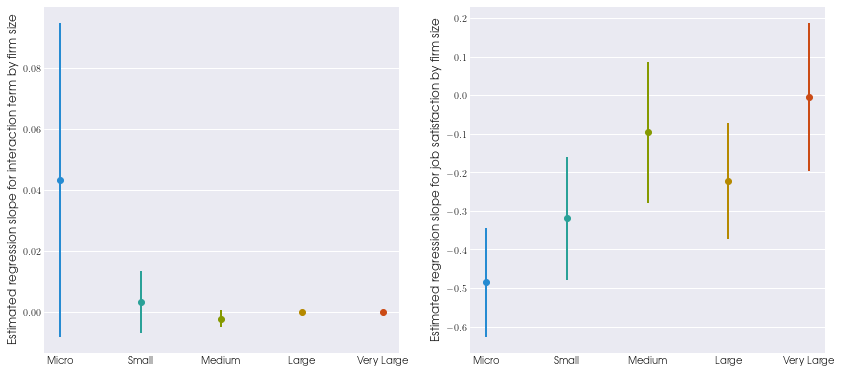

In [87]:
## --------- code to complete: this is the focus of problem set 4 -------------
# %% visualization
plt.style.use('seaborn-darkgrid')

# figure
fig = plt.figure(figsize=(14,14))

# partitioning the figure 
gs = gridspec.GridSpec(2, 2, figure=fig)
ax0 = fig.add_subplot(gs[0, 0]) 
ax1 = fig.add_subplot(gs[0, 1]) 


# focal variable
preds = estimates_interaction.index[0:]
predss = estimates_job_sat.index[0:]


# let's iterate over the variables included in the model
for i, pred in enumerate(preds):

    # data series
    x = i
    y = estimates_interaction.loc[pred, 'beta']
    y_high = estimates_interaction.loc[pred, 'upper_bound']
    y_low = estimates_interaction.loc[pred, 'lower_bound']

    # plot data
    ax0.errorbar(x, y, fmt='o',
                yerr=np.absolute(y_low - y_high)/2,
                elinewidth=2)

    
for i, pred in enumerate(predss):

    # data series
    x = i
    y = estimates_job_sat.loc[pred, 'beta']
    y_high = estimates_job_sat.loc[pred, 'upper_bound']
    y_low = estimates_job_sat.loc[pred, 'lower_bound']

    # plot data
    ax1.errorbar(x, y, fmt='o',
                yerr=np.absolute(y_low - y_high)/2,
                elinewidth=2)    


# axes
ax0.set_xticks(np.arange(len(preds)))
ax0.set_xticklabels(preds)
ax0.set_ylabel('Estimated regression slope for interaction term by firm size')

ax1.set_xticks(np.arange(len(predss)))
ax1.set_xticklabels(predss)
ax1.set_ylabel('Estimated regression slope for job satisfaction by firm size')

# remove grid
ax0.grid(axis='x')
ax1.grid(axis='x')

# show plot
plt.savefig('ProblemSet4.png')